<a href="https://colab.research.google.com/github/carlosemiliorabazo/deepLearning/blob/master/Asociador_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Librerías a utilizar
import numpy as np
import matplotlib.pyplot as plt

In [2]:
W = np.array([[-0.9, 0.2],[-0.2,-0.6],[-0.7,0.3]]) 
x = np.array([1,1])
y = np.array([1,0,1])
epsilon = 0.1

In [3]:
escalon = np.vectorize(lambda x: 0 if(x<0) else 1) 
relu = np.vectorize(lambda x: max(0,x))
tanh = np.tanh

In [4]:
mse = lambda y,_y: np.mean((y-_y)**2)

In [5]:
itr = 3 # No iteraciones

In [6]:
def training_step(i,W,x,y,f,display): 
  z = np.matmul(W,x)
  _y = f(z)
  err_abierto = mse(z,y) 
  err_TFA = mse(_y,y)
  if display:
    print(f"\n[{i+1}/{itr}] --- Error Abierto: {err_abierto} Error TFA: {err_TFA}") 
    print(f"W: \n{W} \n_y: {_y} z: {z}")
  return err_abierto, err_TFA

def training(itr,W,x,y,f,display): 
  err = []
  for i in range(itr):
    err_abierto, err_TFA = training_step(i,W,x,y,f,display) 
    err.append(err_TFA)
    # Regla Hebbiana: Wnew = W + ΔW
    delta_W = epsilon * np.array([x]*len(y)) * np.transpose(np.array([y]*len(x))) 
    Wnew = W + delta_W
    W = Wnew
  return W,err

In [7]:
t = training(itr,W,x,y,escalon,True) 
print(f"\nMatriz de pesos final: \n{t[0]}")


[1/3] --- Error Abierto: 1.8299999999999998 Error TFA: 0.6666666666666666
W: 
[[-0.9  0.2]
 [-0.2 -0.6]
 [-0.7  0.3]] 
_y: [0 0 0] z: [-0.7 -0.8 -0.4]

[2/3] --- Error Abierto: 1.4433333333333334 Error TFA: 0.6666666666666666
W: 
[[-0.8  0.3]
 [-0.2 -0.6]
 [-0.6  0.4]] 
_y: [0 0 0] z: [-0.5 -0.8 -0.2]

[3/3] --- Error Abierto: 1.11 Error TFA: 0.3333333333333333
W: 
[[-0.7  0.4]
 [-0.2 -0.6]
 [-0.5  0.5]] 
_y: [0 0 1] z: [-0.3 -0.8  0. ]

Matriz de pesos final: 
[[-0.6  0.5]
 [-0.2 -0.6]
 [-0.4  0.6]]


In [8]:
training(itr,W,x,y,relu,True)
print(f"\nMatriz de pesos final: \n{t[0]}")


[1/3] --- Error Abierto: 1.8299999999999998 Error TFA: 0.6666666666666666
W: 
[[-0.9  0.2]
 [-0.2 -0.6]
 [-0.7  0.3]] 
_y: [0 0 0] z: [-0.7 -0.8 -0.4]

[2/3] --- Error Abierto: 1.4433333333333334 Error TFA: 0.6666666666666666
W: 
[[-0.8  0.3]
 [-0.2 -0.6]
 [-0.6  0.4]] 
_y: [0 0 0] z: [-0.5 -0.8 -0.2]

[3/3] --- Error Abierto: 1.11 Error TFA: 0.6666666666666666
W: 
[[-0.7  0.4]
 [-0.2 -0.6]
 [-0.5  0.5]] 
_y: [0 0 0] z: [-0.3 -0.8  0. ]

Matriz de pesos final: 
[[-0.6  0.5]
 [-0.2 -0.6]
 [-0.4  0.6]]


In [9]:
 training(itr,W,x,y,tanh,True) 
 print(f"\nMatriz de pesos final: \n{t[0]}")


[1/3] --- Error Abierto: 1.8299999999999998 Error TFA: 1.6397333116496322
W: 
[[-0.9  0.2]
 [-0.2 -0.6]
 [-0.7  0.3]] 
_y: [-0.60436778 -0.66403677 -0.37994896] z: [-0.7 -0.8 -0.4]

[2/3] --- Error Abierto: 1.4433333333333334 Error TFA: 1.33747969043518
W: 
[[-0.8  0.3]
 [-0.2 -0.6]
 [-0.6  0.4]] 
_y: [-0.46211716 -0.66403677 -0.19737532] z: [-0.5 -0.8 -0.2]

[3/3] --- Error Abierto: 1.11 Error TFA: 1.0361443651147695
W: 
[[-0.7  0.4]
 [-0.2 -0.6]
 [-0.5  0.5]] 
_y: [-0.29131261 -0.66403677  0.        ] z: [-0.3 -0.8  0. ]

Matriz de pesos final: 
[[-0.6  0.5]
 [-0.2 -0.6]
 [-0.4  0.6]]


Text(20, 0.146988730301389, '0.147')

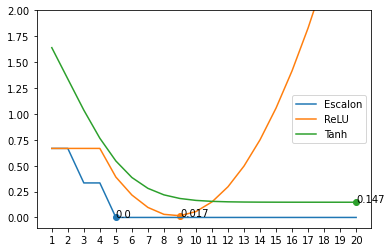

In [10]:
i = list(range(1,21))

# Calculo los errores para 20 iteraciones y el error mínimo
err_escalon = training(20,W,x,y,escalon,False)[1] 
min_escalon = min(err_escalon)
err_relu = training(20,W,x,y,relu,False)[1] 
min_relu = min(err_relu)
err_tanh = training(20,W,x,y,tanh,False)[1] 
min_tanh = min(err_tanh)

# Grafico los errores obtenidos
plt.plot(i,err_escalon)
plt.plot(i,err_relu)
plt.plot(i,err_tanh)
plt.legend(["Escalon","ReLU","Tanh",min_escalon, min_relu, min_tanh]) 
plt.ylim([-0.1,2])
_ = plt.xticks(i)

# Añado los mínimos en forma de puntos
plt.scatter(err_escalon.index(min_escalon)+1,min_escalon) 
plt.annotate(round(min_escalon,3), (err_escalon.index(min_escalon)+1,min_escalon)) 
plt.scatter(err_relu.index(min_relu)+1,min_relu)
plt.annotate(round(min_relu,3), (err_relu.index(min_relu)+1,min_relu)) 
plt.scatter(err_tanh.index(min_tanh)+1,min_tanh)
plt.annotate(round(min_tanh,3), (err_tanh.index(min_tanh)+1,min_tanh))